# Lab 9_1 MNIST and softmax

Solve MNIST with softmax classification.

In [2]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [4]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [5]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [6]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [7]:
# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True).to(device)

In [8]:
# Initialization
torch.nn.init.normal_(linear.weight)

Parameter containing:
tensor([[-0.1953, -0.4404,  0.0139,  ...,  0.7510,  1.5190,  0.9637],
        [ 0.4146, -1.0660, -0.9969,  ..., -0.3259, -0.2695, -1.3316],
        [ 0.2600, -1.1821,  0.0065,  ...,  1.0648, -1.2251,  0.9841],
        ...,
        [ 0.0279, -1.7242, -1.1723,  ...,  1.3651, -0.0689, -0.7931],
        [ 0.0952,  0.1939,  0.1636,  ..., -1.0489,  0.6224, -1.7181],
        [ 2.6504,  0.6297, -1.6571,  ..., -0.0781, -1.1398, -0.8711]],
       requires_grad=True)

In [9]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.Adam(linear.parameters(), lr=learning_rate)

`torch.optim.Adam` is a class in PyTorch that implements the Adam optimization algorithm. Adam stands for Adaptive Moment Estimation, and it is an extension of the stochastic gradient descent (SGD) algorithm. Adam combines the advantages of two other extensions of SGD: Adaptive Gradient Algorithm (AdaGrad) and Root Mean Square Propagation (RMSProp).

Here are the key features of the Adam optimizer:

1. **Adaptive Learning Rates**: Adam computes individual adaptive learning rates for different parameters. This helps in dealing with sparse gradients and noisy data.

2. **Momentum**: Adam uses the concept of momentum by maintaining an exponentially decaying average of past gradients (first moment) and past squared gradients (second moment).

3. **Bias Correction**: Adam includes bias correction to account for the initialization of the first and second moment estimates, which helps in stabilizing the optimizer in the early stages of training.

Parameters:

- `params`: Iterable of parameters to optimize or dictionaries defining parameter groups.
- `lr` (float, optional): Learning rate (default: 1e-3).
- `betas` (Tuple[float, float], optional): Coefficients used for computing running averages of gradient and its square (default: (0.9, 0.999)).
- `eps` (float, optional): Term added to the denominator to improve numerical stability (default: 1e-8).
- `weight_decay` (float, optional): Weight decay (L2 penalty) (default: 0).
- `amsgrad` (boolean, optional): Whether to use the AMSGrad variant of this algorithm (default: False).

In [10]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 5.728238583
Epoch: 0002 cost = 1.562848210
Epoch: 0003 cost = 1.036820531
Epoch: 0004 cost = 0.828017235
Epoch: 0005 cost = 0.710269094
Epoch: 0006 cost = 0.633605838
Epoch: 0007 cost = 0.577520013
Epoch: 0008 cost = 0.535485446
Epoch: 0009 cost = 0.502551079
Epoch: 0010 cost = 0.476104438
Epoch: 0011 cost = 0.453757465
Epoch: 0012 cost = 0.435718447
Epoch: 0013 cost = 0.420195520
Epoch: 0014 cost = 0.406820953
Epoch: 0015 cost = 0.394985616
Learning finished


Accuracy: 0.891700029373169


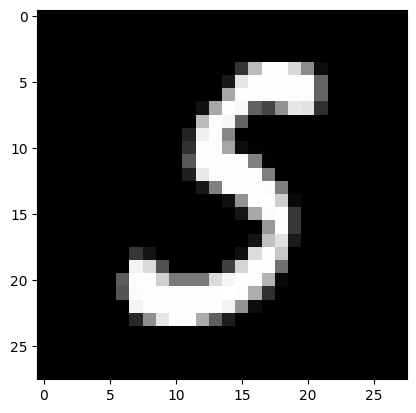

Label:  5
Prediction:  5


In [12]:
# Test the model using test sets
import matplotlib.pyplot as plt
with torch.no_grad():
    X_test = mnist_test.data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.targets.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.targets[r:r + 1].to(device)

    plt.imshow(mnist_test.data[r].numpy(), cmap='gray')
    plt.show()
    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())